In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
env = gym.make_vec('ALE/MontezumaRevenge-v5', 32, 'sync', obs_type='grayscale', frameskip=4, repeat_action_probability=0, full_action_space=True)
envs = list(env.call('unwrapped'))

In [51]:
ram = []
obs, info = env.reset()
ram.append(np.stack([e.ale.getRAM() for e in envs]))
for i in range(100):
    env.step(np.random.randint(0, 18, 32))
    ram.append(np.stack([e.ale.getRAM() for e in envs]))

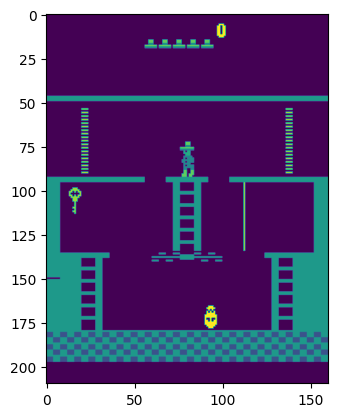

In [53]:
plt.imshow(obs[0])

In [43]:
ram = np.stack(ram, axis=1)

In [44]:
ram.shape

(101, 32, 128)

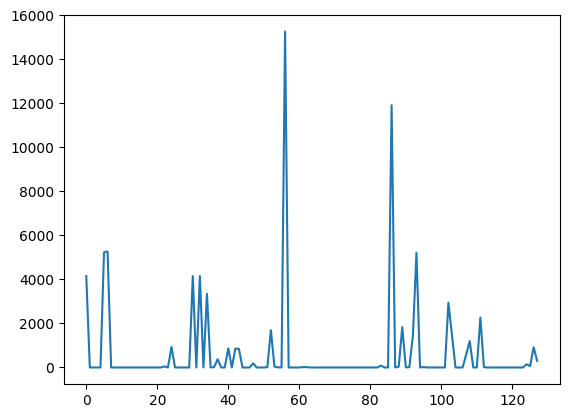

In [45]:
plt.plot(ram.var(axis=(0, 1)))

In [27]:
envs = list(env.call('unwrapped'))

In [4]:
env = gym.make_vec('ALE/MontezumaRevenge-v5', 4, 'sync', frameskip=(1, 30), repeat_action_probability=0.0, full_action_space=True)
envs = list(env.call('unwrapped'))
a = envs[0].ale.getRAM().copy()
print(envs[0].ale.getFrameNumber())
env.reset()
for i in range(100):
    env.step(np.random.randint(0, 18, 32))
b = envs[0].ale.getRAM().copy()
print(envs[0].ale.getFrameNumber())
envs = list(env.call('unwrapped'))
c = envs[0].ale.getRAM().copy()
print(envs[0].ale.getFrameNumber())
# print(a-a)
# print(b-a)
# print(c-a)

0
1613
1613


In [22]:
env = make_env(lib='gymnasium')

ValueError: Disable frame-skipping in the original env. Otherwise, more than one frame-skip will happen as through this wrapper

In [143]:
import env_atari
import buffers

In [151]:
%%time
env = env_atari.make_env('MontezumaRevenge', n_envs=32, lib='gymnasium')
buffer = buffers.Buffer(env, 2048) 
buffer.collect(RandomAgent(18), 1)

CPU times: user 1min 2s, sys: 166 ms, total: 1min 2s
Wall time: 1min 2s


In [150]:
buffer.rams.shape

torch.Size([32, 512, 128])

In [99]:
buffer.collect(RandomAgent(18), 1)

ValueError: not enough values to unpack (expected 5, got 4)

   sync SPS:  640
   
  async SPS: 2600
  
envpool SPS: 8100

In [23]:
env = envpool.make_gymnasium('BeamRider-v5', num_envs=16, full_action_space=True, reward_clip=True)

In [24]:
obs, info = env.reset()

In [25]:
for _ in range(500):
    obs, rew, term, trunc, info = env.step(np.random.randint(0, 18, 16))
    if (rew>0).any():
        print(rew)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [43]:
env = make_env_gymnasium(16, 'MontezumaRevenge', False)

In [44]:
obs, info = env.reset()

In [45]:
info

{'lives': array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]),
 '_lives': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]),
 'episode_frame_number': array([11, 27, 30,  6,  4, 12, 29, 25, 12, 23, 25, 13, 20, 28, 18, 12]),
 '_episode_frame_number': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]),
 'frame_number': array([11, 27, 30,  6,  4, 12, 29, 25, 12, 23, 25, 13, 20, 28, 18, 12]),
 '_frame_number': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True])}

In [304]:
api = wandb.Api()
# run = api.run("akarshkumar0101/egb-atari/3f22lzjl")
runs = api.runs('akarshkumar0101/egb-atari')

In [305]:
for run in runs:
    print(run.config['env_ids'][0], run.config['obj'], len(run.history(pandas=False, samples=2000)))

KungFuMaster rnd 1102
Asterix ext 1102
Qbert ext 1102
Skiing rnd 1102
NameThisGame ext 1102
PrivateEye ext 1102
BattleZone ext 1102
MontezumaRevenge rnd 1102
Asterix rnd 1102
Freeway ext 1102
NameThisGame rnd 1102
KungFuMaster ext 1102
CrazyClimber rnd 1102
Berzerk ext 1102
FishingDerby rnd 1102
Assault rnd 1102
Tennis rnd 1102
Enduro rnd 1102
Qbert rnd 1102
Pitfall ext 1102
Freeway rnd 1102
BankHeist ext 1102
BeamRider ext 1102
Jamesbond ext 1102
Pitfall rnd 1102
SpaceInvaders rnd 1102
Berzerk rnd 1102
CrazyClimber ext 1102
Atlantis rnd 1102
ChopperCommand ext 1102
Centipede rnd 1102
Atlantis ext 1102
IceHockey rnd 1102
Surround rnd 1102
DemonAttack ext 1102
Solaris ext 1102
RoadRunner ext 1102
Robotank ext 1102
Asteroids rnd 1102
MontezumaRevenge ext 1102
RoadRunner rnd 1102
Riverraid ext 1102
Gravitar rnd 1102
Krull ext 1102
DemonAttack rnd 1102
Gopher rnd 1102
Amidar rnd 1102
Breakout rnd 1102
BankHeist rnd 1102
MsPacman rnd 1102
Bowling rnd 1102
Centipede ext 1102
MsPacman ext 110

In [306]:
run = api.run("akarshkumar0101/egb-atari/3f22lzjl")

In [307]:
a = run.history(samples=2000)

Unable to load pandas, call history with pandas=False


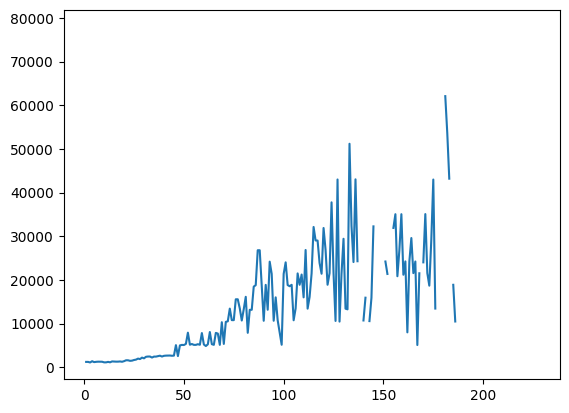

In [308]:
plt.plot([ai['returns_max/Pong_ret_traj'] for ai in a])

In [162]:
import buffers

In [170]:
%%time
env = make_env('MontezumaRevenge', n_envs=8, lib='gymnasium')
buffer_random = buffers.Buffer(env, 64)
agent_random = RandomAgent(18)

env = make_env('MontezumaRevenge', n_envs=8, lib='gymnasium')
buffer_eval = buffers.Buffer(env, 64)
agent_eval = RandomAgent(18)

CPU times: user 1.93 s, sys: 0 ns, total: 1.93 s
Wall time: 1.93 s


In [171]:
buffer_random.collect(agent_random, 1)

In [184]:
buffer_eval.collect(agent_eval, 1)

In [223]:
ram_var = buffer_random.rams.float().var(dim=(0, 1)).clamp(1, None)

In [224]:
a = buffer_eval.rams.float().var(dim=(0, 1))/ram_var

In [229]:
div_traj = (buffer_eval.rams.float().var(dim=1)/ram_var).mean(dim=0).mean().item()
div_buff = (buffer_eval.rams.float().var(dim=(0, 1))/ram_var).mean().item()
div_traj, div_buff

(0.3095785975456238, 0.41831329464912415)

In [254]:
batch = buffer_eval.generate_batch(8, 64)

In [255]:
print(batch['ram'].shape)
div_traj = (batch['ram'].float().var(dim=1)/ram_var).mean(dim=0).mean().item()
div_buff = (batch['ram'].float().var(dim=(0, 1))/ram_var).mean().item()
div_traj, div_buff

torch.Size([8, 64, 128])


(0.3095785975456238, 0.41831329464912415)

In [256]:
print(batch['obs'].shape)
div_traj = (batch['obs'].float().var(dim=1)).mean(dim=0).mean().item()
div_buff = (batch['obs'].float().var(dim=(0, 1))).mean().item()
div_traj, div_buff

torch.Size([8, 64, 1, 84, 84])


(85.26681518554688, 96.46015930175781)

In [275]:
i1, i2 = torch.randint(low=0, high=64, size=(2,))
obs1 = repeat(batch['obs'][:, i1], "b 1 ... -> b 3 ...") / 255.0 * 2.0 - 1.0
obs2 = repeat(batch['obs'][:, i2], "b 1 ... -> b 3 ...") / 255.0 * 2.0 - 1.0
d = loss_fn_alex(obs1, obs2).flatten()

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [287]:
i1, i2 = torch.randint(low=0, high=8*64, size=(2, 8))
obs1 = repeat(batch['obs'].flatten(0, 1)[i1], "b 1 ... -> b 3 ...") / 255.0 * 2.0 - 1.0
obs2 = repeat(batch['obs'].flatten(0, 1)[i2], "b 1 ... -> b 3 ...") / 255.0 * 2.0 - 1.0
d = loss_fn_alex(obs1, obs2).flatten()

In [297]:
a = buffer_eval.generate_batch(buffer_eval.env.num_envs, buffer_eval.n_steps)['obs']
b = buffer_eval.generate_batch(buffer_eval.env.num_envs, buffer_eval.n_steps)['obs']

In [301]:
torch.allclose(a,b)

True

In [ ]:
eval_diversity.calc

'MontezumaRevenge'

In [324]:
print(eval_diversity.calc_div_traj_ram(buffer_eval, 'MontezumaRevenge'))
print(eval_diversity.calc_div_buff_ram(buffer_eval, 'MontezumaRevenge'))
print(eval_diversity.calc_div_traj_pix(buffer_eval))
print(eval_diversity.calc_div_buff_pix(buffer_eval))
print(eval_diversity.calc_div_traj_lpips(buffer_eval))
print(eval_diversity.calc_div_buff_lpips(buffer_eval))

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
0.607555627822876
0.7540725469589233
85.26681518554688
96.46015930175781
0.043092645704746246
0.04385114833712578


In [307]:
import eval_diversity

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


In [273]:
import lpips

In [274]:
loss_fn_alex = lpips.LPIPS(net="alex")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
